## Task 1

In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#get HTML text of welcome page
base_url = 'http://comp20008-jh.eng.unimelb.edu.au:9889/main/'
welcome_page = requests.get(base_url)

In [10]:
#parse HTML text into parts
soup = BeautifulSoup(welcome_page.text,'html.parser')
seed_item = soup.find_all('a')[0]
seed_url = base_url + seed_item['href']

#iterate all urls, until every url has been visited once
to_be_visited = [seed_url]
visited = []
heading_lst = []
records = {}
while (len(to_be_visited) != 0):
    page = requests. get(to_be_visited[0])
    soup = BeautifulSoup(page.text,'html.parser')
    
    #extract the headings and next_url
    heading = soup.find("h1", attrs={"class":"headline"}).text
    heading_lst.append(heading)
    
    urls = soup.find_all('a')
    next_page = urls[1]
    next_url = base_url+ str(next_page['href'])
    
    #if all urls(in to_be_visited) are visited, crawling comletes.
    visited.append(to_be_visited[0])
    if next_url not in visited:
        to_be_visited.append(next_url)
        to_be_visited.pop(0)
    else:
        break

In [11]:
# output
records = {'headline': heading_lst, 'url': visited} 
df = pd.DataFrame(records)
df.to_csv('task1.csv',index = False, encoding = 'utf-8' )

## Task 2

In [12]:
import re
import json
import matplotlib.pyplot as plt

#get name_lst as matching keywords from tennis.json
with open('tennis.json') as file:
    data = json.load(file)
    name_lst = []
    for record in data:
        name_lst.append(record['name'])

In [13]:
##This function checks if the score is valid. If true, return the absolute value of game difference, otherwise -1.
def check_validity(scores):
    game_diff = 0
    for set_scr in scores:
        if (set_scr[0] != '('):
            temp = re.findall(r'\d+', set_scr)
            res = list(map(int, temp))
            diff = res[0]-res[1]
            if ((diff == 0 and res[0]!=5 and res[0] !=6) or abs(diff)>6):
                return -1
            else:
                game_diff += diff
    return abs(game_diff)

In [14]:
first_namelst = []
operated_url = []
score = []
headlines = []
game_difference = []

##Iterate through all pages and add valid names and scores into lists
for url in visited:
    #get text for each article
    page = requests.get(url)
    soup = BeautifulSoup(page.text,'html.parser')
    text = soup.find('div', id = 'articleDetail')
    
    #search match score by re patttern
    pattern = r'(\(?[0-9]+[-/][0-9]+\)?[ ]*){2,10}'
    search = re.search(pattern,text.text)
    
    name_dict = {}
    if (search != None):
        #check validity of score
        scores = search.group(0).rstrip().split(" ")
        valid_diff = check_validity(scores)
        if (valid_diff != -1):
            for name in name_lst:
                name_search = re.search(name.casefold(),text.text.casefold())
                if (name_search != None):
                    index_pos = name_search.span()[0]
                    name_dict[name] = index_pos
            #check existence of first named player
            if (len(name_dict)!=0):
                first_namelst.append(min(name_dict, key=name_dict.get))
                score.append(search.group(0))
                operated_url.append(url)
                headlines.append(soup.find("h1").text)
                game_difference.append(valid_diff)

In [15]:
# output
records2 = {'url': operated_url, 'headline': headlines,'player': first_namelst, 'score': score} 
df2 = pd.DataFrame(records2)
df2
#df2.to_csv('task2.csv',index = False, encoding = 'utf-8' )

,url,headline,player,score
0,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Henman overcomes rival Rusedski,TIM HENMAN,4-6 7-6 (8-6) 6-4
1,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Safin slumps to shock Dubai loss,MARAT SAFIN,7-6 (7-2) 6-4
2,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Roddick into San Jose final,ANDY RODDICK,7-6 (7-3) 6-3
3,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Young debut cut short by Ginepri,ROBBY GINEPRI,6-2 6-2
4,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Melzer shocks Agassi,ANDRE AGASSI,6-3 6-1
5,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Federer forced to dig deep,ROGER FEDERER,4-6 6-3 7-6
6,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Nadal marches on in Mexico,RAFAEL NADAL,7-5 6-3
7,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Henman hopes ended in Dubai,TIM HENMAN,7-5 6-4
8,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Hewitt falls to Dent,LLEYTON HEWITT,7-6 (7-4) 6-3
9,http://comp20008-jh.eng.unimelb.edu.au:9889/ma...,Hewitt overcomes wobble in Sydney,LLEYTON HEWITT,7-5 6-0


## Task 3

In [16]:
#abs of game difference is identified in check_validity function in Task2
#group the rows by player names and calculate the average diff for each player
df2['game_difference'] = game_difference
game_score = df2[['player', 'game_difference']]
average = pd.DataFrame(game_score.groupby('player')['game_difference'].mean())
average.reset_index(level=0, inplace=True)
df3 = average.rename(columns={'game_difference':'avg_game_diff'})
df3
#df3.to_csv('task3.csv',index = False, encoding = 'utf-8' )

,player,avg_game_diff
0,ANDRE AGASSI,7.0
1,ANDY RODDICK,5.0
2,CARLOS MOYA,4.6
3,DOMINIK HRBATY,1.0
4,GAEL MONFILS,3.0
5,GREG RUSEDSKI,4.0
6,GUILLERMO CORIA,4.0
7,JOACHIM JOHANSSON,5.0
8,JUAN CARLOS FERRERO,13.0
9,LLEYTON HEWITT,4.2


## Task 4

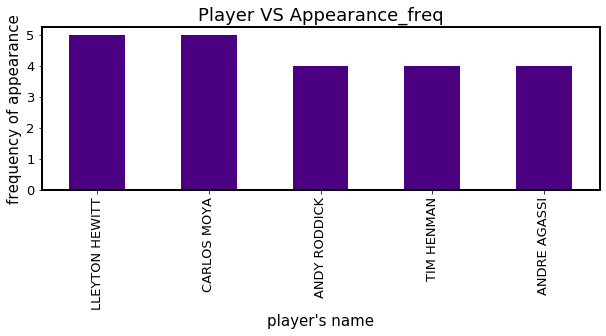

In [106]:
#count the freq and take top 5 frequent names
count = df2.groupby('player').count()
df4 = count['url'].sort_values(ascending=False)[:5]

pl= df4.plot(kind='bar', figsize=(10,3), color="indigo", fontsize=13)
pl.set_alpha(0.8)
pl.set_title("Player VS Appearance_freq", fontsize=18)
pl.set_ylabel("frequency of appearance", fontsize=15);
pl.set_xlabel("player's name", fontsize=15);
plt.savefig("task4.png")
plt.show()

## Task 5

In [107]:
from pandas.plotting import parallel_coordinates

#take information of win percentage and add into df3
win_pct = {}
for record in data:
    if record['name'] in first_namelst:
        win_pct[record['name']]= record['wonPct']

#sorted win_pct dictionary based on alphabetic order of names, to match with player names. 
name_sorted_pct = dict(sorted(win_pct.items()))
df3['win_percentage'] = name_sorted_pct.values()

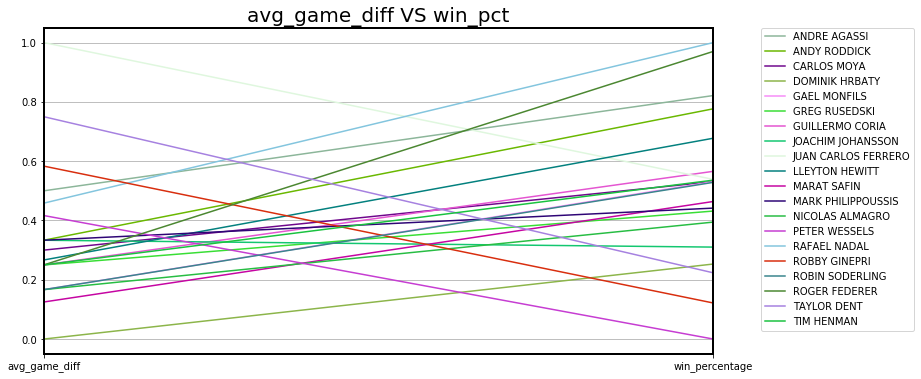

In [108]:
#normalise and scale data
df3['avg_game_diff'] = (df3['avg_game_diff']-df3['avg_game_diff'].min())/(df3['avg_game_diff'].max()-df3['avg_game_diff'].min())
df3['win_percentage'] = (df3['win_percentage'].str.rstrip('%').astype(float)-df3['win_percentage'].str.rstrip('%').astype(float).min())/(df3['win_percentage'].str.rstrip('%').astype(float).max()-df3['win_percentage'].str.rstrip('%').astype(float).min())

#plot in parallel co-ordinates
#set the column 'player' as the class feature used to color the objects.
pd.plotting.parallel_coordinates(df3[['avg_game_diff', 'win_percentage', 'player']],'player')

params = {'axes.linewidth': 2,
          'figure.figsize': (12,6)}
plt.rcParams.update(params)
plt.title('avg_game_diff VS win_pct', fontsize = 20)
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0., prop = {'size':10})
plt.savefig("task5.png")